In [56]:
# database link: https://www.kaggle.com/tunguz/big-five-personality-test


In [57]:
# importing libs

import os
from io import open
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns


pd.options.display.max_columns = 150

In [58]:
# set up the data

df = pd.read_csv('dataset\data-final.csv', sep='\t')

In [59]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6,1,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11,1,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7,1,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7,1,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,2179.00,3324.00,2255.00,430

In [60]:
# looking the database info

pd.options.display.float_format = "{:.2f}".format
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013558.00,1013275.00,1013275.00,1013275.00,1013558.00,1015341.00,1015341.00
mean,2.65,2.77,3.29,3.14,3.28,2.40,2.77,3.41,2.96,3.56,3.29,3.17,3.85,2.66,2.84,2.84,3.05,2.68,3.09,2.77,2.26,3.83,2.26,3.93,2.27,3.74,2.20,3.69,3.79,3.59,3.30,2.93,3.98,2.62,2.63,2.83,3.70,2.47,3.20,3.59,3.65,2.08,4.00,2.00,3.79,1.89,3.98,3.18,4.12,3.96,97019.95,8341.05,11641.24,7645.37,7143.99,7453.52,10899.23,7039.18,6157.74,7417.39,9434.20,9247.13,7728.74,12843.82,10374.50,8123.31,7107.81,7942.96,5524.53,4755.13,18271.61,8798.99,6635.66,9045.58,11179.48,6255.79,8248.70,8956.07,5365.63,6046.34,12296.67,10254.03,9066.49,9198.06,9035.05,11725.84,5556.95,11138.42,5432.48,10788.70,8387.32,13014.47,7190.82,13289.73,6281.84,8256.58,7689.49,5423.94,6325.80,5336.31,1149.51,826.26,959.07,675.42,2701.41,10.45
std,1.26,1.32,1.22,1.24,1.28,1.23,1.40,1.27,1.35,1.31,1.35,1.23,1.16,1.25,1.27,1.33,1.29,1.34,1.30,1.32,1.34,1.14,1.28,1.13,1.17,1.22,1.12,1.10,1.17,1.08,1.18,1.39,1.04,1.25,1.27,1.42,1.13,1.14,1.28,1.05,1.16,1.11,1.10,1.09,0.99,1.10,1.01,1.26,1.04,1.03,4887845.12,562532.18,2328112.68,338186.04,602378.57,567553.19,2190123.91,368270.69,248150.85,2144985.27,1241508.83,627180.09,709929.31,2401873.27,2181408.32,701385.32,431757.24,2154117.94,445318.62,170542.14,1741056.03,718069.68,259010.18,757183.83,2180418.44,350588.14,666975.94,1399846.88,163231.31,304489.74,1314490.89,572528.45,1257300.68,721609.44,1014837.49,2243966.30,268993.46,565574.04,404109.44,2205455.77,931681.73,1221541.65,376368.73,3047609.98,341401.39,564269.15,584198.71,262974.76,429890.56,440822.49,560.09,180.25,51040.05,20178.64,1483898.06,39.83
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-42958762.00,-75632.00,-3593866.00,-2494907.00,-58566.00,-79860.00,-3594255.00,-461138.00,-59370.00,-142238.00,-112165.00,-71572.00,-41381.00,-3598047.00,-88286.00,-3574100.00,-2520786.00,-3599692.00,-79175662.00,-43558.00,-2757521.00,-3592606.00,-1795552.00,-67786.00,-61865.00,-247504.00,-65423.00,-764938.00,-527846.00,-85674.00,-3590638.00,-35996486.00,-94464.00,-3597020.0

In [61]:
#remove other columns (keeping only the questions)

df.drop(df.columns[50:], axis=1, inplace=True)

In [62]:
# verify the records in EXT1 column (3720 with value equals zero)

df["EXT1"].value_counts()

3.00    288622
1.00    249711
2.00    199165
4.00    191638
5.00     80702
0.00      3720
Name: EXT1, dtype: int64

In [63]:
# lets see all the value 0 itemns in our dataframe

df[(df == 0.00).all(axis=1)].describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00,2094.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
# cleaning up the dataframe

df = df[(df > 0.00).all(axis=1)]

In [65]:
# checking it again

df["EXT1"].value_counts()

3.00    247835
1.00    216949
2.00    176207
4.00    166599
5.00     66844
Name: EXT1, dtype: int64

In [66]:
# importing libs

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [67]:
# instanciating kmeans and visualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))

In [68]:
# getting a random piece of the data with 6000 observations

data_sample = df.sample(n=6000, random_state=1)

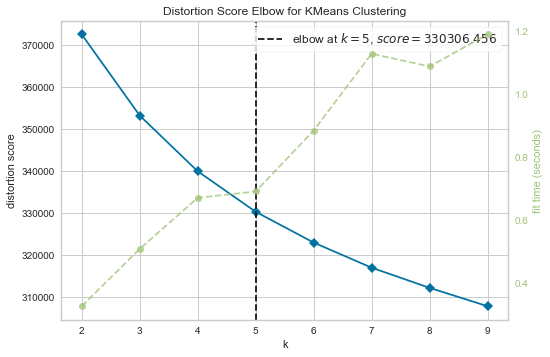

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# lets see the data

visualizer.fit(data_sample)
visualizer.poof()

In [70]:
# Grouping people in five groups

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df)

In [71]:
predictions = k_fit.labels_
df['Clusters'] = predictions

In [73]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,4
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,0
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,0
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,1
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,4


In [74]:
# checking clusters

df["Clusters"].value_counts()

2    193408
0    182398
4    181712
3    171239
1    145677
Name: Clusters, dtype: int64

In [76]:
# grouping data by cluster

df.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.14,3.28,3.13,3.64,3.00,2.69,2.24,3.99,2.34,4.12,3.53,3.09,4.16,2.63,2.83,2.81,2.87,2.43,2.97,2.70,1.86,3.98,1.67,4.38,1.96,4.18,1.99,4.00,4.19,3.74,3.85,2.22,4.29,2.02,3.25,2.06,4.17,2.02,3.85,3.89,3.56,2.17,3.87,2.08,3.71,2.00,4.00,2.95,4.26,3.78
1,2.15,3.45,2.79,3.59,2.61,2.87,2.12,3.71,2.70,3.99,2.44,3.71,3.13,2.99,2.40,2.11,2.41,2.01,2.71,2.39,3.09,2.99,2.67,2.86,3.28,2.75,3.14,2.95,2.68,3.07,3.28,2.92,3.83,2.48,2.43,2.83,3.55,2.59,2.88,3.51,3.73,1.96,3.80,2.05,3.80,2.05,4.09,3.32,3.92,3.85
2,3.46,1.91,3.80,2.50,4.06,1.82,3.67,2.76,3.78,2.99,3.82,2.95,4.25,2.42,3.28,3.48,3.81,3.45,3.65,3.18,2.14,4.30,2.66,4.20,2.00,4.02,1.85,3.91,4.14,3.86,2.99,3.62,3.85,3.24,2.23,3.52,3.47,2.83,2.95,3.49,3.78,2.10,4.27,1.95,3.98,1.76,4.00,3.40,4.21,4.21
3,1.81,3.63,2.24,4.06,2.30,3.18,1.75,4.08,2.17,4.49,4.29,2.46,4.53,2.13,3.57,3.90,4.01,3.78,4.01,3.96,2.45,3.39,2.58,3.86,2.54,3.88,2.70,3.45,3.69,3.07,2.83,3.37,3.82,3.49,2.08,3.50,3.57,3.05,2.78,3.32,3.52,2.38,4.08,2.12,3.43,2.08,3.69,3.19,4.30,3.73
4,3.47,1.95,4.34,2.22,4.27,1.67,3.88,2.81,3.76,2.52,2.31,3.86,3.14,3.32,2.11,1.90,2.10,1.67,2.11,1.71,1.89,4.45,1.84,4.25,1.87,3.85,1.60,4.10,4.08,4.20,3.74,2.59,4.19,1.90,3.13,2.29,3.87,1.95,3.58,3.89,3.91,1.75,4.10,1.79,4.17,1.66,4.34,3.26,4.11,4.30


In [77]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]